<a href="https://colab.research.google.com/github/migvanderlei/rna-2-2/blob/main/PP2_2_2_Proposic%CC%A7a%CC%83o_e_Avaliac%CC%A7a%CC%83o_de_RNAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import copy

In [ ]:
data = pd.read_csv("covtype.csv")
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
categorical_columns = [f'Wilderness_Area{i+1}' for i in range(4)] + [f'Soil_Type{i+1}' for i in range(40)]

In [ ]:
data = data.drop(categorical_columns, axis=1)
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5


In [ ]:
y = data["Cover_Type"]
X = data.drop(["Cover_Type"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

In [ ]:
clf = MLPClassifier(random_state=42, max_iter=300,
                    activation='relu', solver='adam',
                    verbose=True).fit(X_train_std, y_train)

Iteration 1, loss = 0.72402161
Iteration 2, loss = 0.63423901
Iteration 3, loss = 0.61644464
Iteration 4, loss = 0.60387251
Iteration 5, loss = 0.59409156
Iteration 6, loss = 0.58641581
Iteration 7, loss = 0.57957870
Iteration 8, loss = 0.57359969
Iteration 9, loss = 0.56838852
Iteration 10, loss = 0.56384610
Iteration 11, loss = 0.55955934
Iteration 12, loss = 0.55575685
Iteration 13, loss = 0.55214114
Iteration 14, loss = 0.54916334
Iteration 15, loss = 0.54625651
Iteration 16, loss = 0.54348615
Iteration 17, loss = 0.54089815
Iteration 18, loss = 0.53858444
Iteration 19, loss = 0.53664607
Iteration 20, loss = 0.53414735
Iteration 21, loss = 0.53261664
Iteration 22, loss = 0.53072767
Iteration 23, loss = 0.52921340
Iteration 24, loss = 0.52785223
Iteration 25, loss = 0.52661588
Iteration 26, loss = 0.52525489
Iteration 27, loss = 0.52379268
Iteration 28, loss = 0.52274097
Iteration 29, loss = 0.52175910
Iteration 30, loss = 0.52028613
Iteration 31, loss = 0.51939512
Iteration 32, los

In [ ]:
y_pred = clf.predict(X_test_std)

<AxesSubplot:>

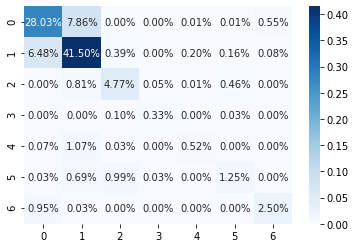

In [ ]:
cf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix),
            annot=True, fmt='.2%', cmap='Blues')

In [ ]:
def print_metrics(y_pred, y_test):
  print(f"Acurácia: {accuracy_score(y_pred=y_pred, y_true=y_test)}")
  print(f"Precisão: {precision_score(y_pred=y_pred, y_true=y_test, average='macro')}")
  print(f"Revocação: {recall_score(y_pred=y_pred, y_true=y_test, average='macro')}")
  print(f"F1: {f1_score(y_pred=y_pred, y_true=y_test, average='macro')}")

In [ ]:
print_metrics(y_pred, y_test)

Acurácia: 0.7889893519368459
Precisão: 0.7540782895845793
Revocação: 0.6513844334392414
F1: 0.6877289267228832


In [ ]:
f1_list = []
accuracy_list = []

for i in range(3):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

  clf = MLPClassifier(random_state=42, max_iter=300, activation='relu', solver='adam', verbose=False)
  print(f"Treinando rede {i+1}...")
  clf.fit(X_train_std, y_train)

  y_pred = clf.predict(X_test_std)

  f1_list.append(f1_score(y_pred=y_pred, y_true=y_test, average='macro'))
  accuracy_list.append(accuracy_score(y_pred=y_pred, y_true=y_test))

Treinando rede 1...
Treinando rede 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede 3...


In [ ]:
print(f"Acurácia:\n\tMédia: {np.mean(accuracy_list)}\n\tDesvio Padrão: {np.std(accuracy_list)}")
print(f"F1 Score:\n\tMédia: {np.mean(f1_list)}\n\tDesvio Padrão: {np.std(f1_list)}")

Acurácia:
	Média: 0.7939270852457011
	Desvio Padrão: 0.003826383434151487
F1 Score:
	Média: 0.7021841900828356
	Desvio Padrão: 0.008816180481857179


## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [ ]:
clf_list = [
 ("rede_1", MLPClassifier(hidden_layer_sizes=(10), solver='adam', max_iter=150, activation='relu')),
 ("rede_2", MLPClassifier(hidden_layer_sizes=(10, 50), solver='adam', max_iter=150, activation='tanh')),
 ("rede_3", MLPClassifier(hidden_layer_sizes=(10, 50), solver='sgd', max_iter=100, activation='relu')),
 ("rede_4", MLPClassifier(hidden_layer_sizes=(40, 50), solver='sgd', max_iter=200, activation='identity')),
 ("rede_5", MLPClassifier(hidden_layer_sizes=(25, 30), solver='adam', max_iter=200, activation='relu')),
 ("rede_6", MLPClassifier(hidden_layer_sizes=(10, 30), solver='adam', max_iter=200, activation='relu')),
 ("rede_7", MLPClassifier(hidden_layer_sizes=(15, 15), solver='sgd', max_iter=100, activation='identity')),
 ("rede_8", MLPClassifier(hidden_layer_sizes=(40), solver='adam', max_iter=150, activation='relu')),
 ("rede_9", MLPClassifier(hidden_layer_sizes=(15), solver='sgd', max_iter=200, activation='tanh')),
 ("rede_10", MLPClassifier(hidden_layer_sizes=(20, 40), solver='adam', max_iter=100, activation='relu')),
]

In [ ]:
resultados = {}

In [ ]:
for name, clf in clf_list:
  best_f1 = 0
  best_cf_matrix = []
  f1_list = []
  accuracy_list = []

  for i in range(3):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

    print(f"Treinando {name} - iteração {i+1}...")
    clf.fit(X_train_std, y_train)

    y_pred = clf.predict(X_test_std)

    f1 = f1_score(y_pred=y_pred, y_true=y_test, average='macro')
    accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
    
    f1_list.append(f1)
    accuracy_list.append(accuracy)

    if f1 > best_f1:
      best_f1 = f1
      best_cf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
    
  resultados[name] = ({
    'f1': f1_list,
    'accuracy': accuracy_list,
    'cf_matrix': best_cf_matrix
    })

Treinando rede_1 - iteração 1...
Treinando rede_1 - iteração 2...
Treinando rede_1 - iteração 3...
Treinando rede_2 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_2 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_2 - iteração 3...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_3 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_3 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_3 - iteração 3...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_4 - iteração 1...
Treinando rede_4 - iteração 2...
Treinando rede_4 - iteração 3...
Treinando rede_5 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_5 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_5 - iteração 3...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_6 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_6 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_6 - iteração 3...
Treinando rede_7 - iteração 1...
Treinando rede_7 - iteração 2...
Treinando rede_7 - iteração 3...
Treinando rede_8 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_8 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_8 - iteração 3...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_9 - iteração 1...
Treinando rede_9 - iteração 2...
Treinando rede_9 - iteração 3...
Treinando rede_10 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_10 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_10 - iteração 3...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
for name in resultados.keys():
  print(name)
  print("f1", np.array(resultados[name]['f1']).mean())
  print("acc", np.array(resultados[name]['accuracy']).mean())
  print()

rede_1
f1 0.504279363169664
acc 0.7159196958570467

rede_2
f1 0.6712826047981917
acc 0.7865338718560676

rede_3
f1 0.5600712171976977
acc 0.7503423138118842

rede_4
f1 0.4289409746732667
acc 0.6971134722477204

rede_5
f1 0.6865807070843896
acc 0.7854610335964752

rede_6
f1 0.6281717537903079
acc 0.755568814638027

rede_7
f1 0.42729844270785966
acc 0.696987255981886

rede_8
f1 0.6225707643840109
acc 0.7554559849458418

rede_9
f1 0.5016664072307792
acc 0.7286407655590234

rede_10
f1 0.6749405201228208
acc 0.7857937855700386



As três melhores redes foram:


**Rede 10** - hidden_layer_sizes=(20, 40), solver='adam', max_iter=100, activation='relu'
- F1: 0.6758
- Acc 0.782

**Rede 5** - hidden_layer_sizes=(25, 30), solver='adam', max_iter=200, activation='relu'
- F1: 0.6744
- Acc: 0.788

**Rede 2** - hidden_layer_sizes=(10, 50), solver='adam', max_iter=150, activation='tanh'
- F1: 0.6740
- Acc: 0.786

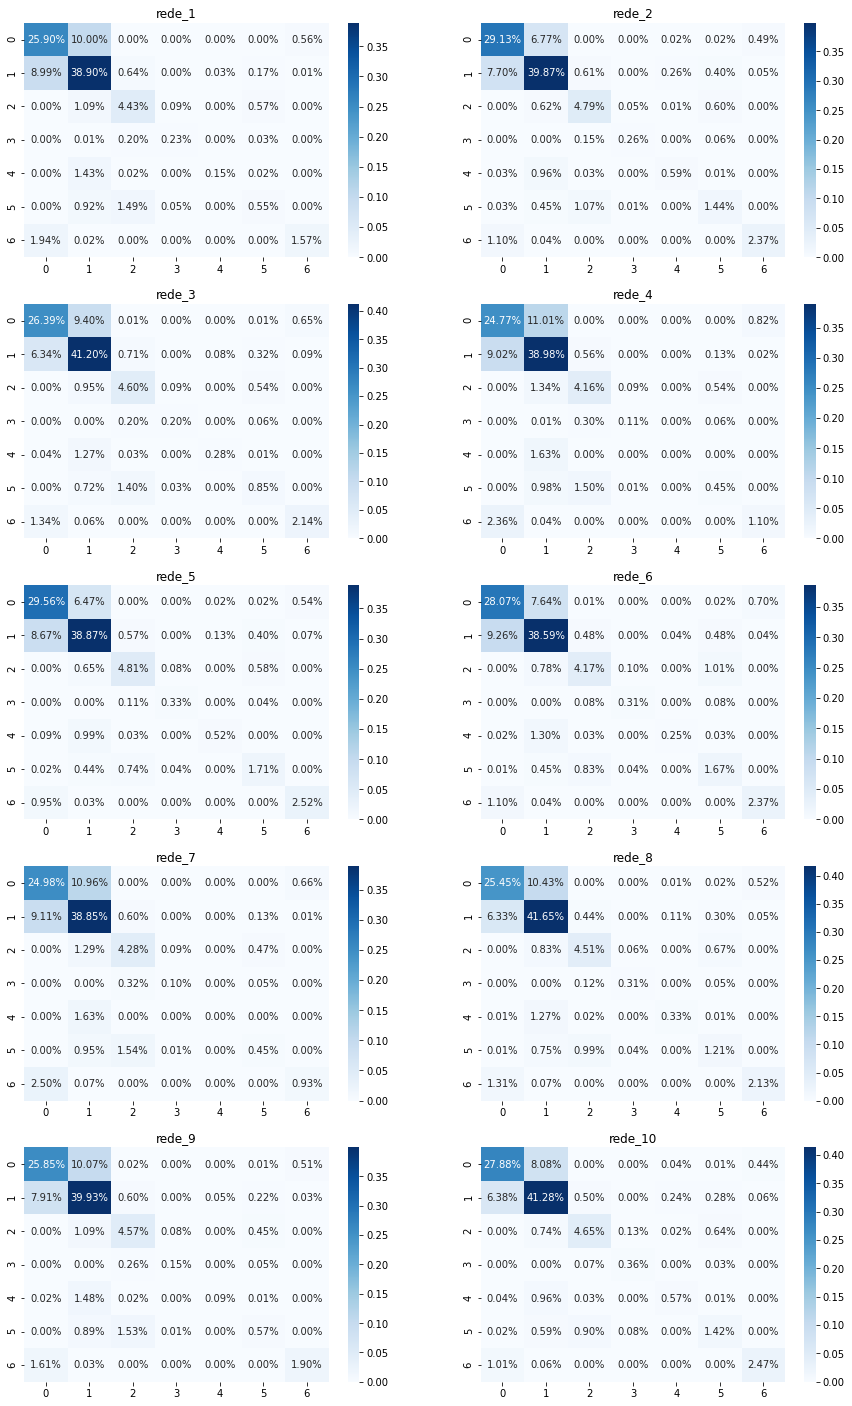

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

for ax, name in zip(axes.flatten(), resultados.keys()):
  resultado = resultados[name]

  cf_matrix = resultado['cf_matrix']
  sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax,
              annot=True, fmt='.2%', cmap='Blues')
  ax.set_title(name)

fig.show()

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

In [ ]:
def pyramid_rule(alpha, n_i=10, n_o=7):
  return int(alpha * (sqrt(n_i * n_o)))

In [ ]:
clf_list_geometric = []

for name, clf in clf_list:
  for i, alpha in enumerate([0.5, 2, 3]):
    new_object = copy.deepcopy(clf)
    setattr(new_object, 'hidden_layer_sizes', pyramid_rule(alpha))
    clf_list_geometric.append((name+"-"+str(i+1), new_object))

In [ ]:
for name, clf in clf_list_geometric:
  best_f1 = 0
  best_cf_matrix = []
  f1_list = []
  accuracy_list = []

  for i in range(3):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

    print(f"Treinando {name} - iteração {i+1}...")
    clf.fit(X_train_std, y_train)

    y_pred = clf.predict(X_test_std)

    f1 = f1_score(y_pred=y_pred, y_true=y_test, average='macro')
    accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
    
    f1_list.append(f1)
    accuracy_list.append(accuracy)

    if f1 > best_f1:
      best_f1 = f1
      best_cf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
    
  resultados[name] = ({
    'f1': f1_list,
    'accuracy': accuracy_list,
    'cf_matrix': best_cf_matrix
    })

Treinando rede_1-1 - iteração 1...
Treinando rede_1-1 - iteração 2...
Treinando rede_1-1 - iteração 3...
Treinando rede_1-2 - iteração 1...
Treinando rede_1-2 - iteração 2...
Treinando rede_1-2 - iteração 3...
Treinando rede_1-3 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_1-3 - iteração 2...
Treinando rede_1-3 - iteração 3...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_2-1 - iteração 1...
Treinando rede_2-1 - iteração 2...
Treinando rede_2-1 - iteração 3...
Treinando rede_2-2 - iteração 1...
Treinando rede_2-2 - iteração 2...
Treinando rede_2-2 - iteração 3...
Treinando rede_2-3 - iteração 1...
Treinando rede_2-3 - iteração 2...
Treinando rede_2-3 - iteração 3...
Treinando rede_3-1 - iteração 1...
Treinando rede_3-1 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_3-1 - iteração 3...
Treinando rede_3-2 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_3-2 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_3-2 - iteração 3...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_3-3 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_3-3 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_3-3 - iteração 3...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_4-1 - iteração 1...
Treinando rede_4-1 - iteração 2...
Treinando rede_4-1 - iteração 3...
Treinando rede_4-2 - iteração 1...
Treinando rede_4-2 - iteração 2...
Treinando rede_4-2 - iteração 3...
Treinando rede_4-3 - iteração 1...
Treinando rede_4-3 - iteração 2...
Treinando rede_4-3 - iteração 3...
Treinando rede_5-1 - iteração 1...
Treinando rede_5-1 - iteração 2...
Treinando rede_5-1 - iteração 3...
Treinando rede_5-2 - iteração 1...
Treinando rede_5-2 - iteração 2...
Treinando rede_5-2 - iteração 3...
Treinando rede_5-3 - iteração 1...
Treinando rede_5-3 - iteração 2...
Treinando rede_5-3 - iteração 3...
Treinando rede_6-1 - iteração 1...
Treinando rede_6-1 - iteração 2...
Treinando rede_6-1 - iteração 3...
Treinando rede_6-2 - iteração 1...
Treinando rede_6-2 - iteração 2...
Treinando rede_6-2 - iteração 3...
Treinando rede_6-3 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_6-3 - iteração 2...
Treinando rede_6-3 - iteração 3...
Treinando rede_7-1 - iteração 1...
Treinando rede_7-1 - iteração 2...
Treinando rede_7-1 - iteração 3...
Treinando rede_7-2 - iteração 1...
Treinando rede_7-2 - iteração 2...
Treinando rede_7-2 - iteração 3...
Treinando rede_7-3 - iteração 1...
Treinando rede_7-3 - iteração 2...
Treinando rede_7-3 - iteração 3...
Treinando rede_8-1 - iteração 1...
Treinando rede_8-1 - iteração 2...
Treinando rede_8-1 - iteração 3...
Treinando rede_8-2 - iteração 1...
Treinando rede_8-2 - iteração 2...
Treinando rede_8-2 - iteração 3...
Treinando rede_8-3 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_8-3 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_8-3 - iteração 3...
Treinando rede_9-1 - iteração 1...
Treinando rede_9-1 - iteração 2...
Treinando rede_9-1 - iteração 3...
Treinando rede_9-2 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_9-2 - iteração 2...
Treinando rede_9-2 - iteração 3...
Treinando rede_9-3 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_9-3 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_9-3 - iteração 3...
Treinando rede_10-1 - iteração 1...
Treinando rede_10-1 - iteração 2...
Treinando rede_10-1 - iteração 3...
Treinando rede_10-2 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_10-2 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_10-2 - iteração 3...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_10-3 - iteração 1...
Treinando rede_10-3 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_10-3 - iteração 3...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
for name in resultados.keys():
  if not "-" in name:
    continue
  print(name)
  print("f1", np.array(resultados[name]['f1']).mean())
  print("acc", np.array(resultados[name]['accuracy']).mean())
  print()

rede_1-1
f1 0.4369788351165808
acc 0.7024642769720334

rede_1-2
f1 0.542581921505351
acc 0.7260820176243804

rede_1-3
f1 0.585317767765203
acc 0.7368773330885503

rede_2-1
f1 0.4002023090878504
acc 0.7016725567590724

rede_2-2
f1 0.5611627011130071
acc 0.7335211278379536

rede_2-3
f1 0.5894928678001276
acc 0.7480455602472308

rede_3-1
f1 0.3957721964007819
acc 0.7019727984823451

rede_3-2
f1 0.5067471984281074
acc 0.7214330518328133

rede_3-3
f1 0.5268451305662577
acc 0.7304173551190257

rede_4-1
f1 0.38039582169307545
acc 0.6955931399547152

rede_4-2
f1 0.4212762028508332
acc 0.6973200079554495

rede_4-3
f1 0.4236569435282751
acc 0.6964537054035861

rede_5-1
f1 0.40276873807881275
acc 0.702056942659568

rede_5-2
f1 0.543151781500477
acc 0.7295089804785508

rede_5-3
f1 0.6009725466847792
acc 0.7404630224588459

rede_6-1
f1 0.3980083830442278
acc 0.7011944648430329

rede_6-2
f1 0.569971748572498
acc 0.7286369408236949

rede_6-3
f1 0.5760183103652964
acc 0.738973288048467

rede_7-1
f1 0.

As três melhores redes foram:

**Rede 5-3** - hidden_layer_sizes=25, solver='adam', max_iter=200, activation='relu'
- F1: 0.601
- Acc: 0.740


**Rede 2-3** - hidden_layer_sizes=25, solver='adam', max_iter=150, activation='tanh'
- F1: 0.589
- Acc: 0.748

**Rede 8-3** - hidden_layer_sizes=25, solver='adam', max_iter=150, activation='relu'
- F1: 0.589
- Acc: 0.740


## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

In [ ]:
top_6 = [
         ("rede_2", MLPClassifier(hidden_layer_sizes=(10, 50), solver='adam', max_iter=200, activation='tanh')),
         ("rede_5", MLPClassifier(hidden_layer_sizes=(25, 30), solver='adam', max_iter=200, activation='relu')),
         ("rede_10", MLPClassifier(hidden_layer_sizes=(20, 40), solver='adam', max_iter=200, activation='relu')),
         ("rede_5-3", MLPClassifier(hidden_layer_sizes=25, solver='adam', max_iter=200, activation='relu')),
         ("rede_2-3", MLPClassifier(hidden_layer_sizes=25, solver='adam', max_iter=200, activation='tanh')),
         ("rede_8-3", MLPClassifier(hidden_layer_sizes=25, solver='adam', max_iter=200, activation='relu'))
]

In [ ]:
data = pd.read_csv("covtype.csv")
data.head()

y = data["Cover_Type"]
X = data.drop(["Cover_Type"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

resultados_finais = {}

In [ ]:
for name, clf in top_6:
  best_f1 = 0
  best_cf_matrix = []
  f1_list = []
  accuracy_list = []

  for i in range(3):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

    print(f"Treinando {name} - iteração {i+1}...")
    clf.fit(X_train_std, y_train)

    y_pred = clf.predict(X_test_std)

    f1 = f1_score(y_pred=y_pred, y_true=y_test, average='macro')
    accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
    
    f1_list.append(f1)
    accuracy_list.append(accuracy)

    if f1 > best_f1:
      best_f1 = f1
      best_cf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
    
  resultados_finais[name] = ({
    'f1': f1_list,
    'accuracy': accuracy_list,
    'cf_matrix': best_cf_matrix
    })

Treinando rede_2 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_2 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_2 - iteração 3...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_5 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_5 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_5 - iteração 3...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_10 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_10 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_10 - iteração 3...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_5-3 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_5-3 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_5-3 - iteração 3...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_2-3 - iteração 1...
Treinando rede_2-3 - iteração 2...
Treinando rede_2-3 - iteração 3...
Treinando rede_8-3 - iteração 1...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_8-3 - iteração 2...


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Treinando rede_8-3 - iteração 3...


In [ ]:
for name in resultados_finais.keys():
  print(name)
  print("f1", np.array(resultados_finais[name]['f1']).mean(), "+-", np.array(resultados_finais[name]['f1']).std())
  print("acc", np.array(resultados_finais[name]['accuracy']).mean(), "+-", np.array(resultados_finais[name]['accuracy']).std())
  print()

rede_2
f1 0.7283698344725961 +- 0.004562460318191036
acc 0.8283535279358668 +- 0.0027494327454018813

rede_5
f1 0.7589413968921669 +- 0.005506840713481243
acc 0.844903157701487 +- 0.004064990172858894

rede_10
f1 0.7429344425281194 +- 0.012772489305112678
acc 0.8429162076984272 +- 0.003981117746932254

rede_5-3
f1 0.6768207684038922 +- 0.00631193642388777
acc 0.7969161159047795 +- 0.003866655143308349

rede_2-3
f1 0.7030160645216631 +- 0.0049910579377315046
acc 0.8137678997613365 +- 0.0023176902015774356

rede_8-3
f1 0.6708732864045905 +- 0.0062992223764265776
acc 0.7975930940578912 +- 0.003652576181228427



## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?

Com **0.759 +- 0.004** de F1, a Rede 5 (`hidden_layer_sizes=(25, 30), solver='adam', max_iter=200, activation='relu')`) possui um desempenho substancialmente superior às demais.

A Estratégia Própria gerou arquiteturas com os três melhores resultados. A distribuição dos neurônios em pelo menos duas camadas ocultas parece ter tido resultados melhores do que os obtidos pela regra da Pirâmide Geométrica. Curiosamente, as três melhores arquiteturas geradas por esse método foram as que aplicaram a constante alpha = 3.

Considerar os atributos categóricos e padronizar um número mais alto de épocas trouxe melhorias nos resultados de todas as arquiteturas. Um número maior de atributos e de épocas pode levar à generalização mais facilmente.

A maior dificuldade no problema proposto encontra-se no volume de possíveis arquiteturas que precisam ser experimentadas em uma busca extensiva para maximizar os resultados da tarefa de classificação.